# Importing Libs

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier

# Importing scaled dataset of stations

In [3]:
# creating a path to the scaled dataset
path=r"C:\Users\Sam\Desktop\CF\Machine Learning\Achievment 1\DataSets\data_scaled.pkl"

In [4]:
# importing scaled dataset
d=pd.read_pickle(os.path.join(path))

In [5]:
# checking for execution
d.head(1)

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,0.660514,-0.02793,0.826097,-0.001949,-1.101066,-0.265148,-0.179228,-0.902918,...,-0.443701,0.761754,-1.299744,-0.806427,-0.088407,-0.024706,0.372147,-0.668215,-0.519743,-0.752237


# Importing the weather predictions dataset

In [6]:
# creating a path for the set
path1=r"C:\Users\Sam\Desktop\CF\Machine Learning\Achievment 1\04 Supervised ML part 1\Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv"

In [7]:
# importing the dataset
d_answers=pd.read_csv(os.path.join(path1))

In [9]:
#checking for execution
d_answers.head(1)

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Wrangling the sets imported

In [11]:
# checking columns
d.columns

Index(['DATE', 'MONTH', 'BASEL_cloud_cover', 'BASEL_wind_speed',
       'BASEL_humidity', 'BASEL_pressure', 'BASEL_global_radiation',
       'BASEL_precipitation', 'BASEL_snow_depth', 'BASEL_sunshine',
       ...
       'VALENTIA_cloud_cover', 'VALENTIA_humidity', 'VALENTIA_pressure',
       'VALENTIA_global_radiation', 'VALENTIA_precipitation',
       'VALENTIA_snow_depth', 'VALENTIA_sunshine', 'VALENTIA_temp_mean',
       'VALENTIA_temp_min', 'VALENTIA_temp_max'],
      dtype='object', length=170)

In [13]:
d_answers.columns

Index(['DATE', 'BASEL_pleasant_weather', 'BELGRADE_pleasant_weather',
       'BUDAPEST_pleasant_weather', 'DEBILT_pleasant_weather',
       'DUSSELDORF_pleasant_weather', 'HEATHROW_pleasant_weather',
       'KASSEL_pleasant_weather', 'LJUBLJANA_pleasant_weather',
       'MAASTRICHT_pleasant_weather', 'MADRID_pleasant_weather',
       'MUNCHENB_pleasant_weather', 'OSLO_pleasant_weather',
       'SONNBLICK_pleasant_weather', 'STOCKHOLM_pleasant_weather',
       'VALENTIA_pleasant_weather'],
      dtype='object')

In [14]:
# getting all column names for the scaled dataset
column_names = d.columns.tolist()
for column_name in column_names:
    print(column_name)

DATE
MONTH
BASEL_cloud_cover
BASEL_wind_speed
BASEL_humidity
BASEL_pressure
BASEL_global_radiation
BASEL_precipitation
BASEL_snow_depth
BASEL_sunshine
BASEL_temp_mean
BASEL_temp_min
BASEL_temp_max
BELGRADE_cloud_cover
BELGRADE_humidity
BELGRADE_pressure
BELGRADE_global_radiation
BELGRADE_precipitation
BELGRADE_sunshine
BELGRADE_temp_mean
BELGRADE_temp_min
BELGRADE_temp_max
BUDAPEST_cloud_cover
BUDAPEST_humidity
BUDAPEST_pressure
BUDAPEST_global_radiation
BUDAPEST_precipitation
BUDAPEST_sunshine
BUDAPEST_temp_mean
BUDAPEST_temp_min
BUDAPEST_temp_max
DEBILT_cloud_cover
DEBILT_wind_speed
DEBILT_humidity
DEBILT_pressure
DEBILT_global_radiation
DEBILT_precipitation
DEBILT_sunshine
DEBILT_temp_mean
DEBILT_temp_min
DEBILT_temp_max
DUSSELDORF_cloud_cover
DUSSELDORF_wind_speed
DUSSELDORF_humidity
DUSSELDORF_pressure
DUSSELDORF_global_radiation
DUSSELDORF_precipitation
DUSSELDORF_snow_depth
DUSSELDORF_sunshine
DUSSELDORF_temp_mean
DUSSELDORF_temp_min
DUSSELDORF_temp_max
GDANSK_cloud_cover
GDANSK

In [15]:
# readings for GDANSK, ROMA, and TOURS need to be dropped for the scaled set to match the answers set
columns_to_drop = ['GDANSK_humidity',
'GDANSK_precipitation',
'GDANSK_snow_depth',
'GDANSK_temp_mean',
'GDANSK_temp_min',
'GDANSK_temp_max',
'ROMA_cloud_cover',
'ROMA_wind_speed',
'ROMA_humidity',
'ROMA_pressure',
'ROMA_sunshine',
'ROMA_temp_mean',
'TOURS_wind_speed',
'TOURS_humidity',
'TOURS_pressure',
'TOURS_global_radiation',
'TOURS_precipitation',
'TOURS_temp_mean',
'TOURS_temp_min',
'TOURS_temp_max']  
d.drop(columns=columns_to_drop, inplace=True)

In [18]:
# checking for execution
column_namesfinal=d.columns.tolist()
for column_name in column_namesfinal:
    print(column_name)

DATE
MONTH
BASEL_cloud_cover
BASEL_wind_speed
BASEL_humidity
BASEL_pressure
BASEL_global_radiation
BASEL_precipitation
BASEL_snow_depth
BASEL_sunshine
BASEL_temp_mean
BASEL_temp_min
BASEL_temp_max
BELGRADE_cloud_cover
BELGRADE_humidity
BELGRADE_pressure
BELGRADE_global_radiation
BELGRADE_precipitation
BELGRADE_sunshine
BELGRADE_temp_mean
BELGRADE_temp_min
BELGRADE_temp_max
BUDAPEST_cloud_cover
BUDAPEST_humidity
BUDAPEST_pressure
BUDAPEST_global_radiation
BUDAPEST_precipitation
BUDAPEST_sunshine
BUDAPEST_temp_mean
BUDAPEST_temp_min
BUDAPEST_temp_max
DEBILT_cloud_cover
DEBILT_wind_speed
DEBILT_humidity
DEBILT_pressure
DEBILT_global_radiation
DEBILT_precipitation
DEBILT_sunshine
DEBILT_temp_mean
DEBILT_temp_min
DEBILT_temp_max
DUSSELDORF_cloud_cover
DUSSELDORF_wind_speed
DUSSELDORF_humidity
DUSSELDORF_pressure
DUSSELDORF_global_radiation
DUSSELDORF_precipitation
DUSSELDORF_snow_depth
DUSSELDORF_sunshine
DUSSELDORF_temp_mean
DUSSELDORF_temp_min
DUSSELDORF_temp_max
GDANSK_cloud_cover
HEATHR

In [20]:
# dropping DATE and MONTH from the weather station data and DATE from the answers data
d_final=d.drop(columns=["DATE","MONTH"])

In [22]:
d_answers_final=d_answers.drop(columns=["DATE"])

In [23]:
# checking for execution
d_final.head(1)

,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,0.660514,-0.02793,0.826097,-0.001949,-1.101066,-0.265148,-0.179228,-0.902918,-0.528623,-0.845652,...,-0.443701,0.761754,-1.299744,-0.806427,-0.088407,-0.024706,0.372147,-0.668215,-0.519743,-0.752237


In [25]:
d_answers_final.head()

,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [26]:
# saving datasets to be uploaded in a new notebook
path2=r"C:\Users\Sam\Desktop\CF\Machine Learning\Achievment 1\DataSets\Supervised"

In [27]:
d_final.to_pickle(os.path.join(path2,"weather stations.pkl"))

In [28]:
d_answers_final.to_csv(os.path.join(path2,"answers.csv"))

## Realizing that only temp mean is needed from the weather stations dataset I will create a new set with only that info and will not be importing the datasets into a new notebook, will work on K-means in this notebook 

In [30]:
data= d_final[['BASEL_temp_mean',
 'BELGRADE_temp_mean',
 'BUDAPEST_temp_mean',
 'DEBILT_temp_mean',
 'DUSSELDORF_temp_mean',
 'HEATHROW_temp_mean',
 'KASSEL_temp_mean',
 'LJUBLJANA_temp_mean',
 'MAASTRICHT_temp_mean',
 'MADRID_temp_mean',
 'MUNCHENB_temp_mean',
 'OSLO_temp_mean',
 'SONNBLICK_temp_mean',
 'STOCKHOLM_temp_mean',
 'VALENTIA_temp_mean']].copy()

In [32]:
# checking for execution
data.head(1)

,BASEL_temp_mean,BELGRADE_temp_mean,BUDAPEST_temp_mean,DEBILT_temp_mean,DUSSELDORF_temp_mean,HEATHROW_temp_mean,KASSEL_temp_mean,LJUBLJANA_temp_mean,MAASTRICHT_temp_mean,MADRID_temp_mean,MUNCHENB_temp_mean,OSLO_temp_mean,SONNBLICK_temp_mean,STOCKHOLM_temp_mean,VALENTIA_temp_mean
0,-0.528623,-1.016876,-1.099163,-0.114356,-0.105836,-0.106469,-0.182904,-1.370824,-0.097084,-0.98828,-0.265742,-0.186575,-0.124331,-0.391072,-0.668215


In [33]:
# creating matrix
X=data
y=d_answers_final

In [35]:
# checking shape
print(X.shape)
print(y.shape)

(22950, 15)
(22950, 15)


In [36]:
# Splitting data into training and testing sets with 30 to 70 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [37]:
# checking shapes of test and train sets
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(16065, 15)
(6885, 15)
(16065, 15)
(6885, 15)


In [38]:
# Runnig the model with neighbors equal to 1 to 4, testing the accuracy
from sklearn.multioutput import MultiOutputClassifier
k_range = np.arange(1,4)
train_acc = np.empty(len(k_range))
test_acc = np.empty(len(k_range))
scores = {}
scores_list = []
for i, k in enumerate(k_range):
    knn = KNeighborsClassifier(n_neighbors=k)
    classifier = MultiOutputClassifier(knn, n_jobs=-1)
    ## Fitting the model on the training data
    knn.fit(X_train, y_train)
    y_pred_train = knn.predict(X_train)
    y_pred = knn.predict(X_test)
    train_acc[i] = knn.score(X_train, np.array(y_train))
    test_acc[i] = knn.score(X_test, np.array(y_test))

<function matplotlib.pyplot.show(close=None, block=None)>

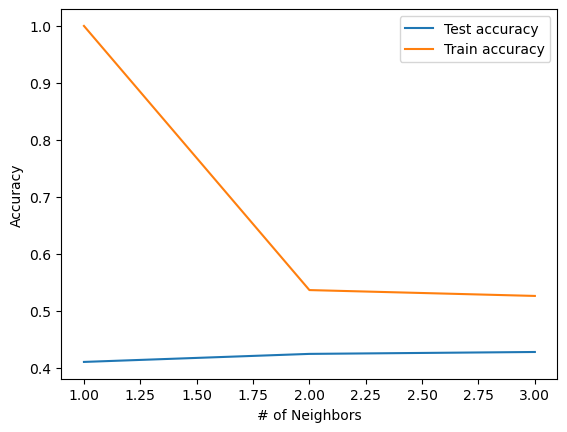

In [39]:
#plot the relationship between number of neighbors and accuracy
plt.plot(k_range, test_acc, label="Test accuracy")
plt.plot(k_range, train_acc, label="Train accuracy")
plt.legend()
plt.xlabel("# of Neighbors")
plt.ylabel("Accuracy")
plt.show

## the training set accuracy drops significantly at 2 neighbors, the testing set is consistently unreliable being accurate about 40% of the time.

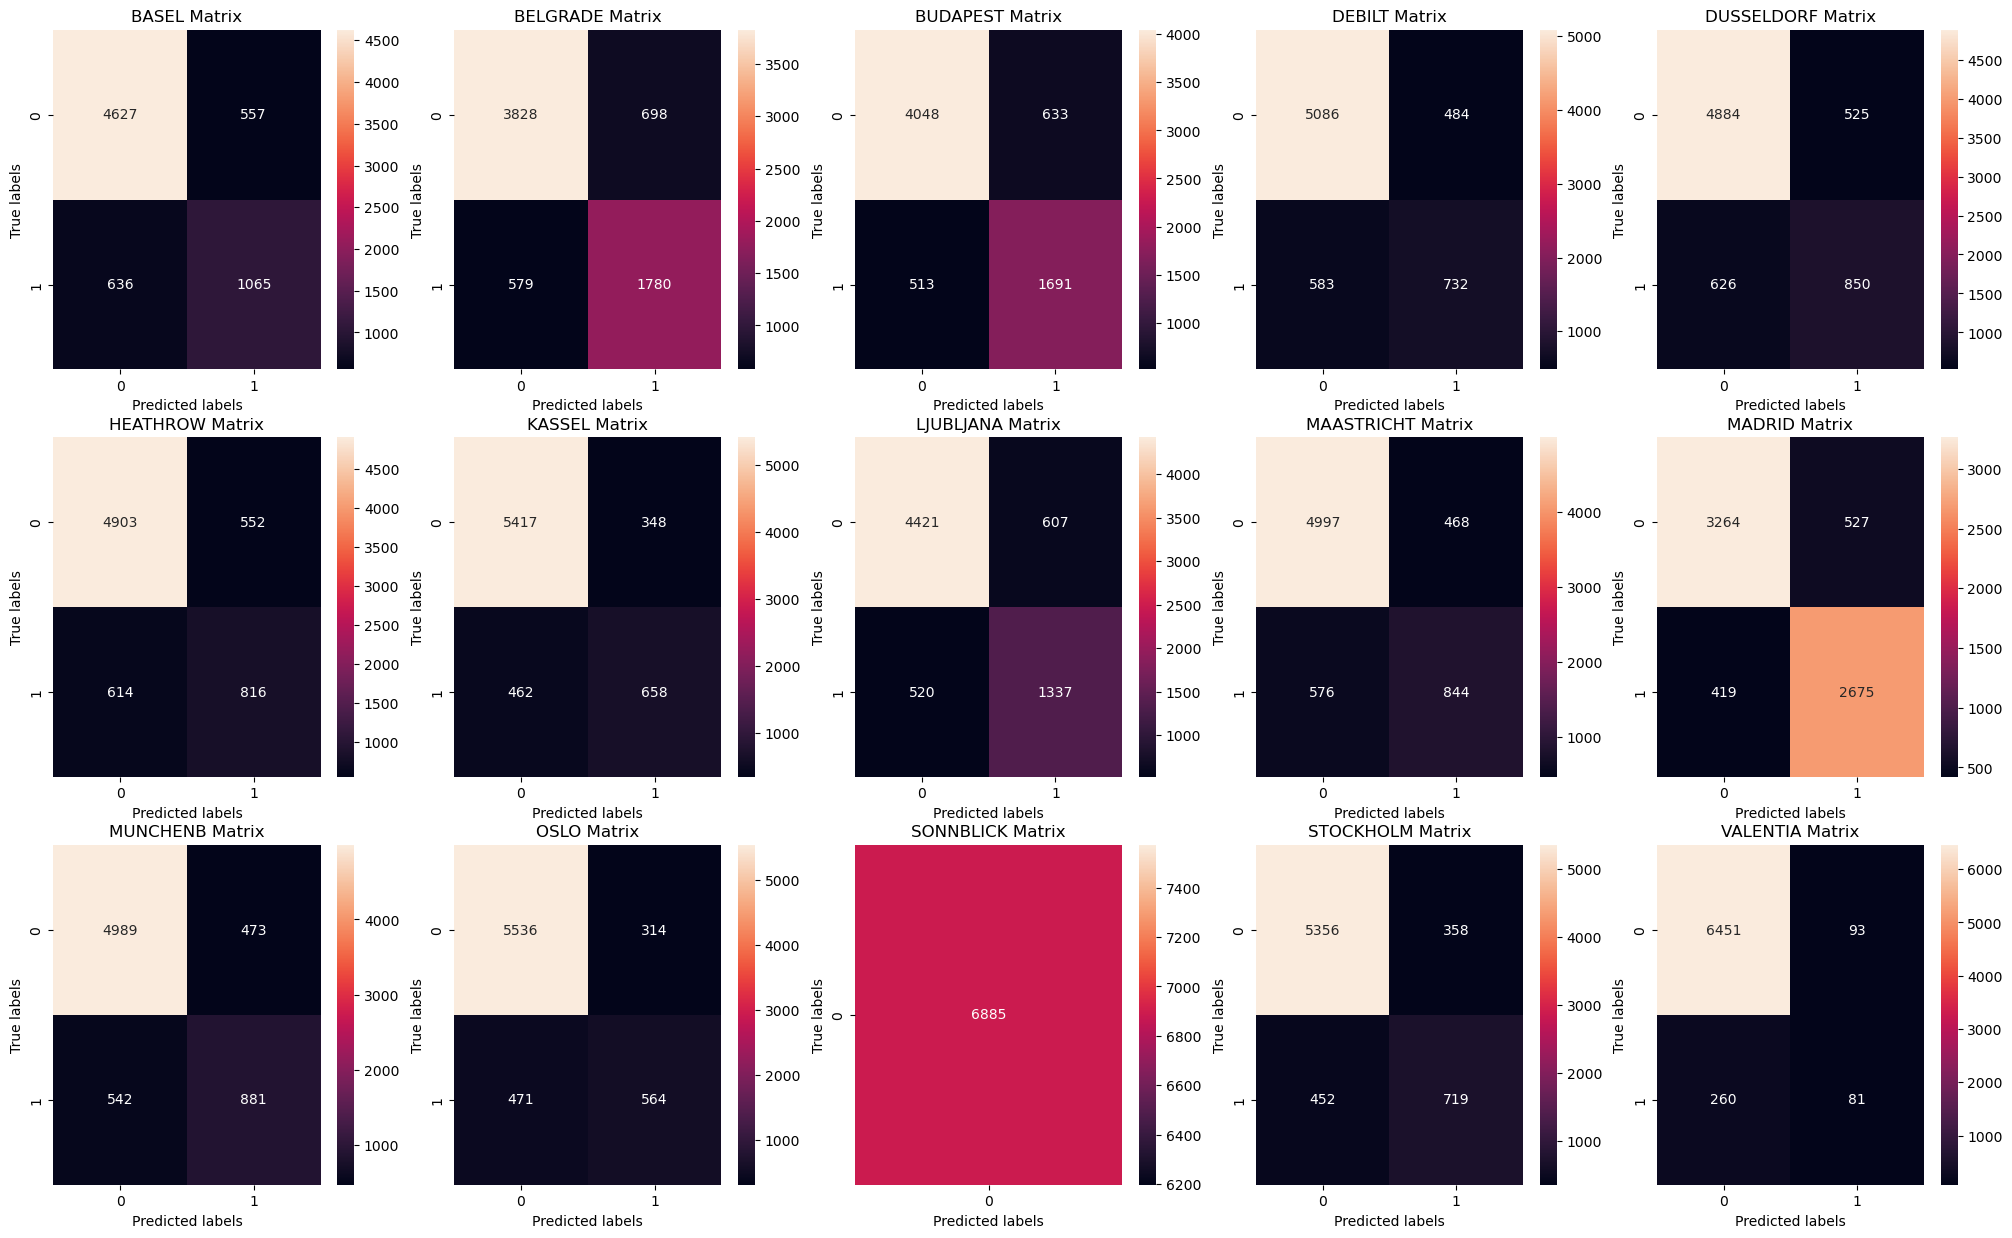

In [45]:
# creating confusion matrix for the testing set
locations = list({x.split("_")[0] for x in d_answers_final.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels);
        #ax[i,j].yaxis.set_ticklabels(labels); 
        count+=1

ValueError: The number of FixedLocator locations (1), usually from a call to set_ticks, does not match the number of labels (2).

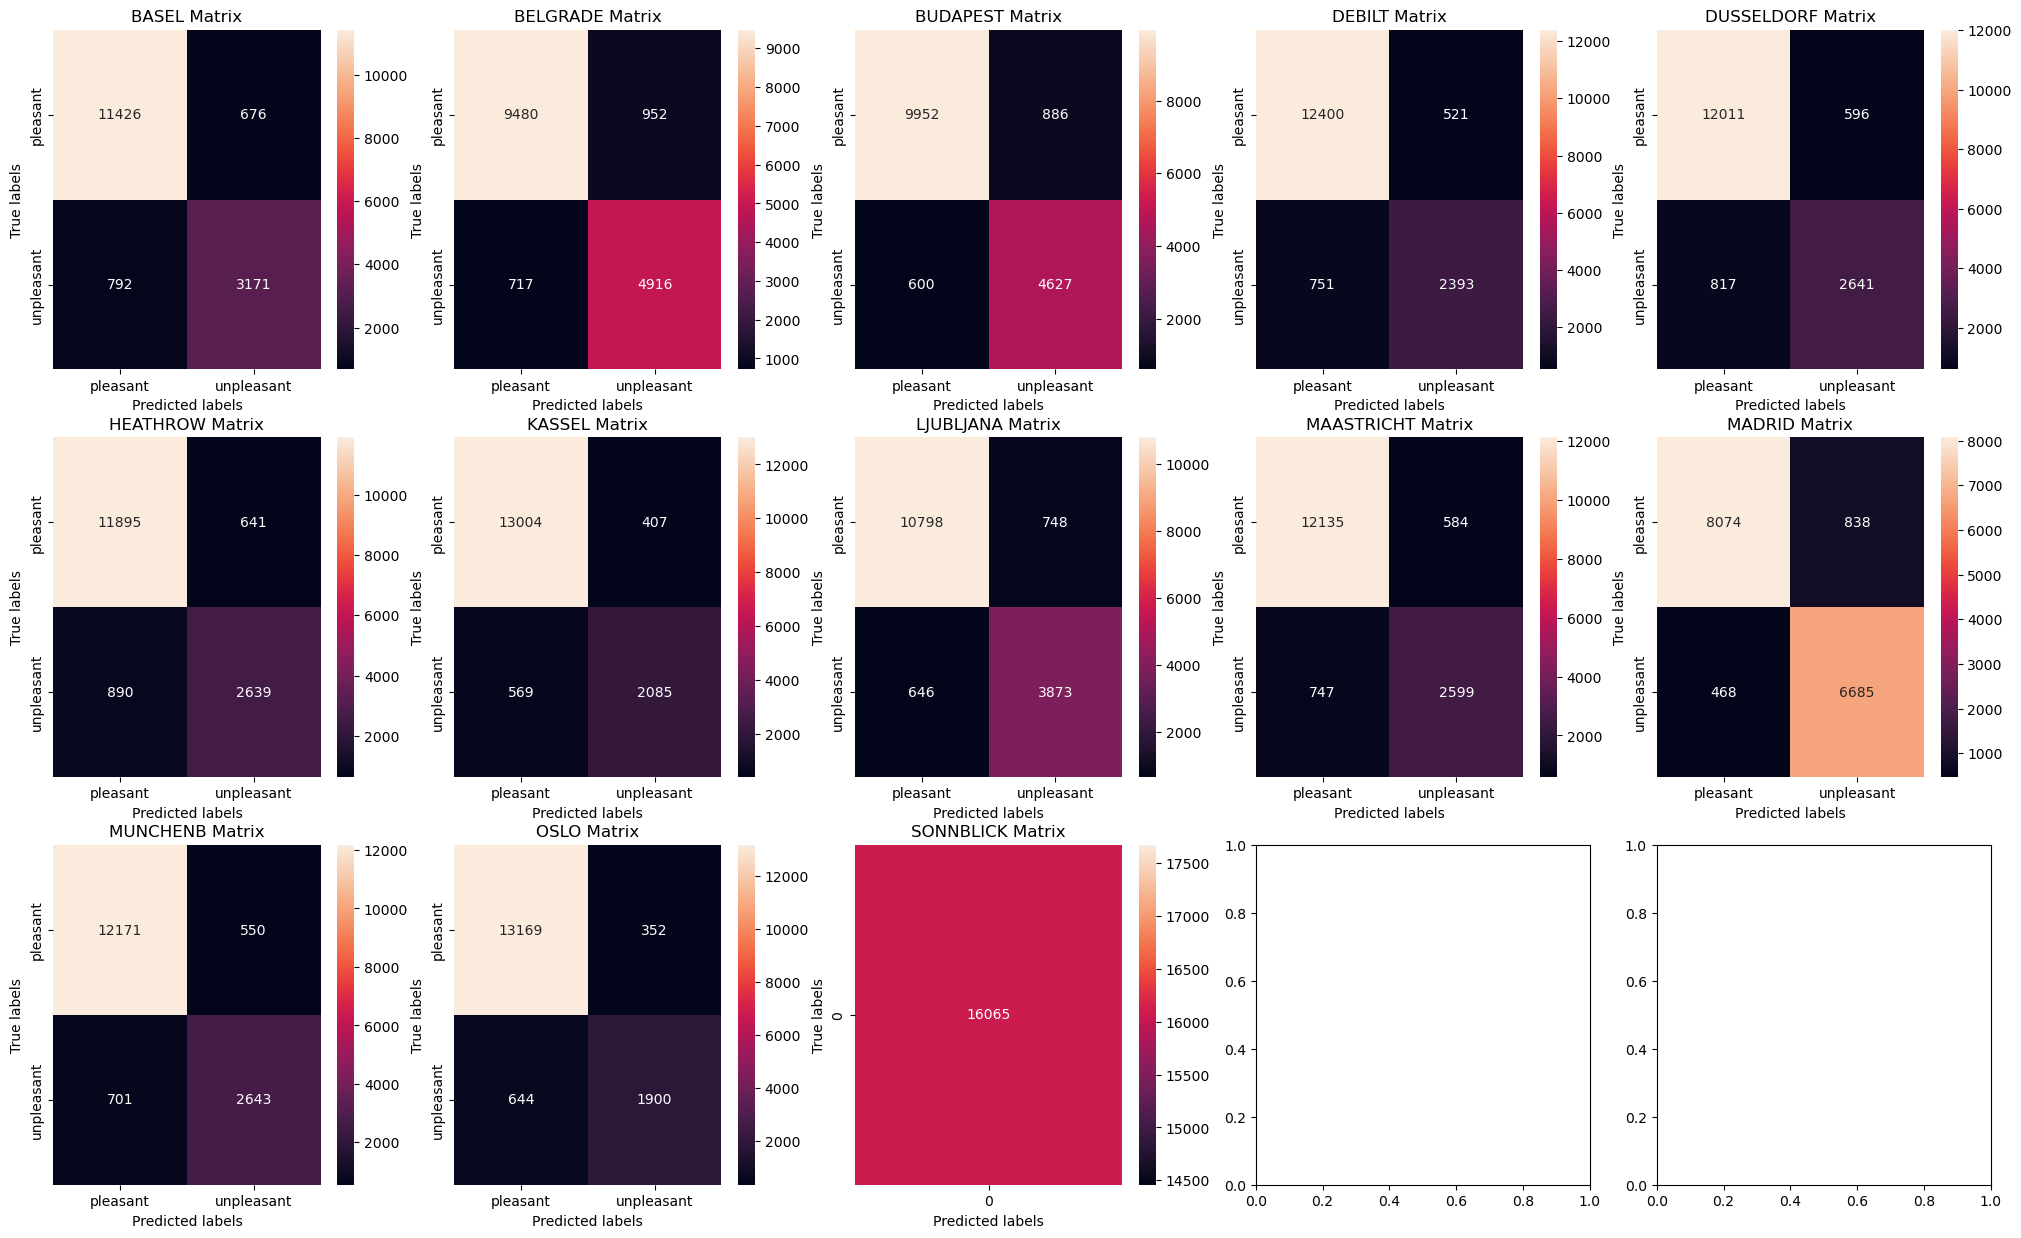

In [47]:
# creating confusion matrix for the training set
locations = list({x.split("_")[0] for x in d_answers_final.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_train.loc[:,name+key], y_pred_train[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        ax[i,j].xaxis.set_ticklabels(labels); 
        ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

### The lines made into code throws a value error indicating that there is a mismatch between the number of ticks and the number of labels specified for the x and y-axis. My guess is that since for SUNNBLICK there was only one type of a prediction made mismatched with the two labels specified "pleasant" and "unpleasant".

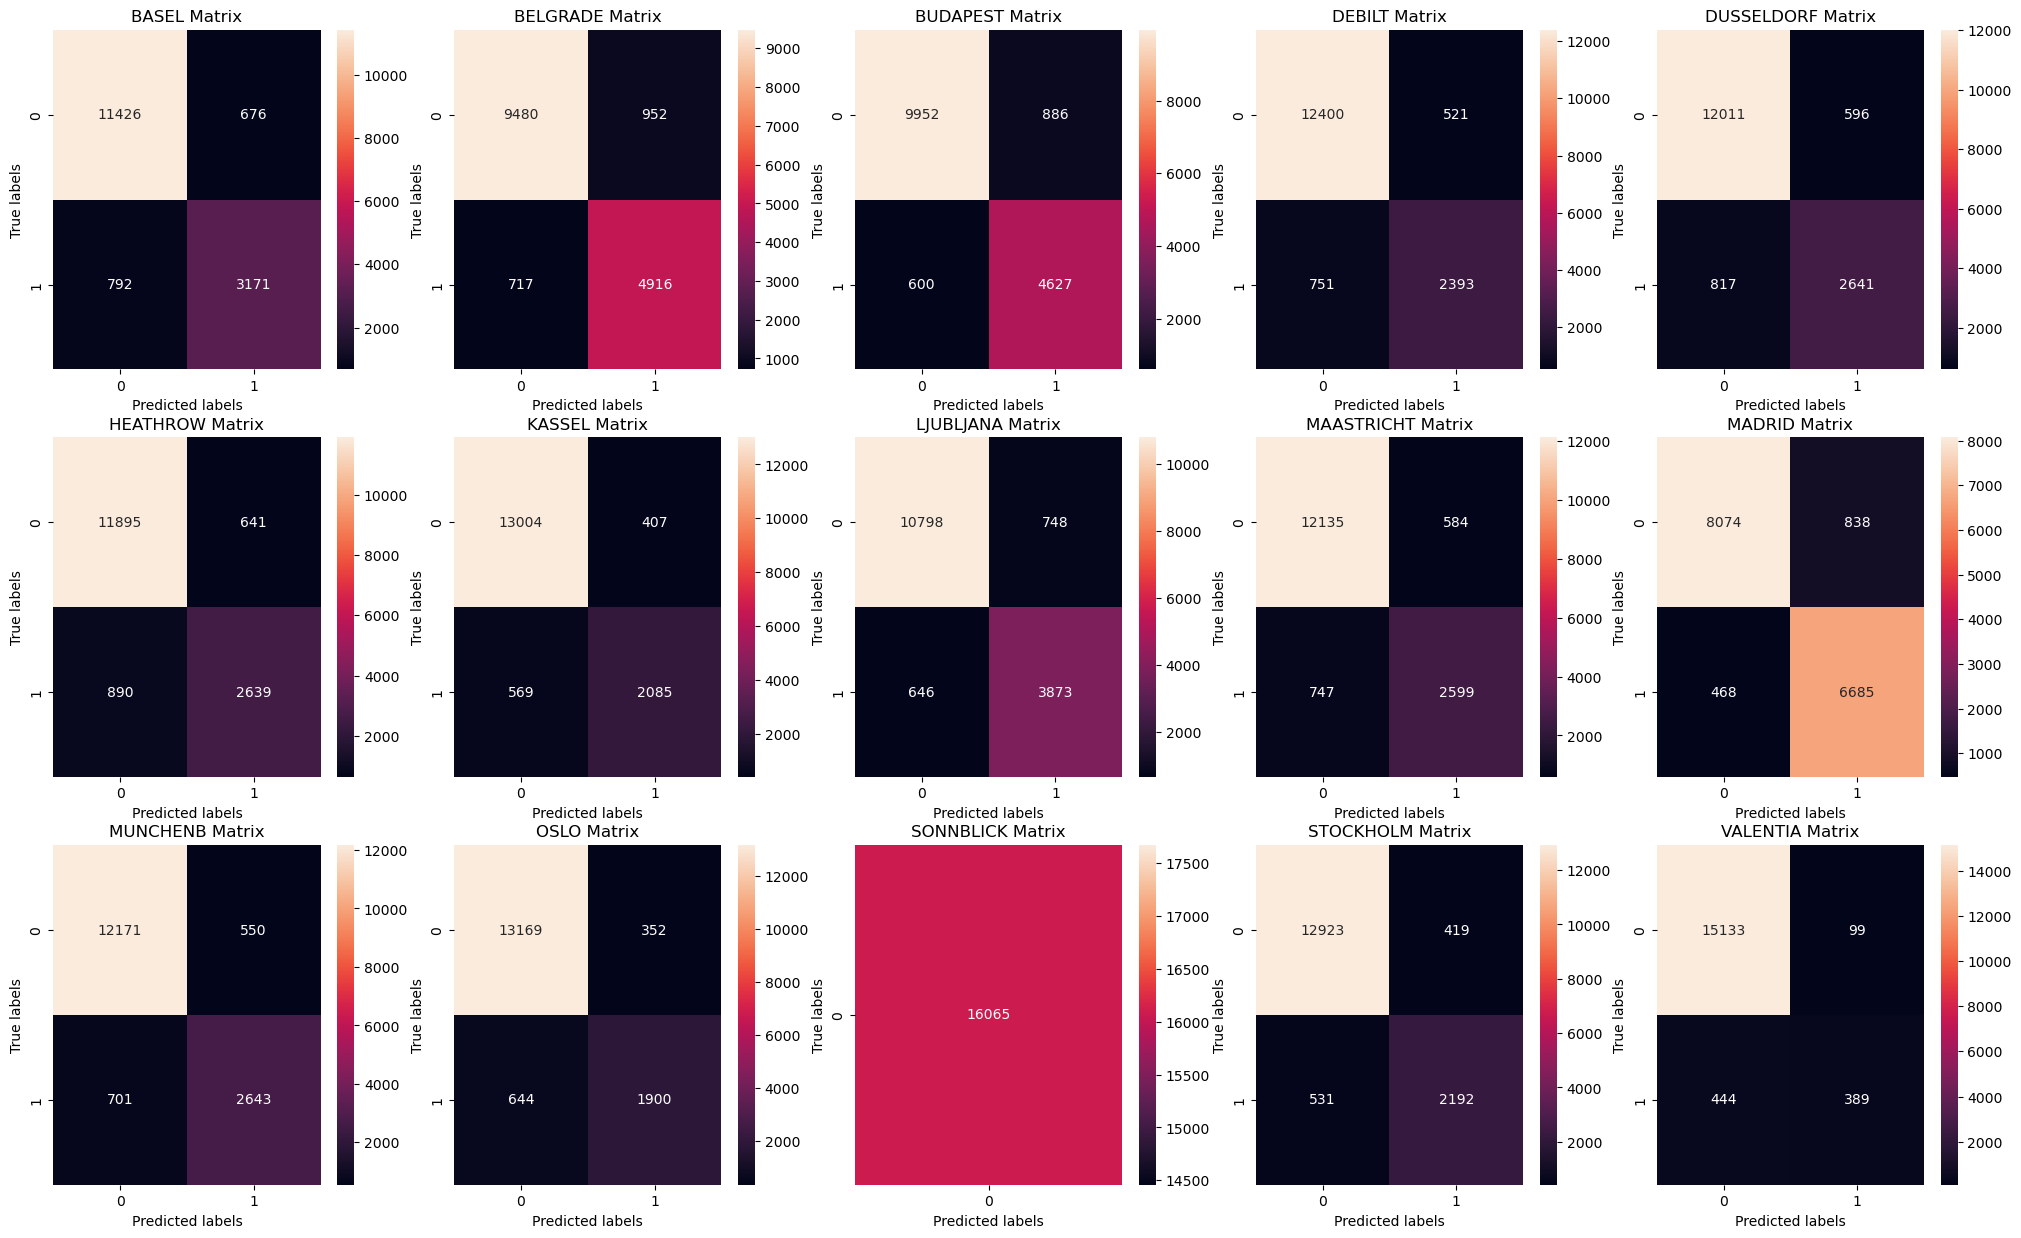

In [49]:
# creating confusion matrix for the training set
locations = list({x.split("_")[0] for x in d_answers_final.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_train.loc[:,name+key], y_pred_train[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); 
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

In [58]:
# checking value counts for "SUNNBLICK_pleasant_weather"
d_answers_final['SONNBLICK_pleasant_weather'].value_counts()

SONNBLICK_pleasant_weather
0    22950
Name: count, dtype: int64

### Pleasant weather answers for SUNNBLICK only have "unpleasant" responses